In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import glob

%matplotlib inline

In [2]:
tests = ['equal', 'northward', 'eastward']

In [3]:
time_index= 0

data={}

for test in tests:
    fname = glob.glob('/data/hdd/test_datasets/GIOPS_f_grid/GIOPS_f_{}_*.nc'.format(test))[0]
    f = nc.Dataset(fname)
    lon = f.variables['longitude'][:]
    lat = f.variables['latitude'][:]
    V = f.variables['yvel'][time_index,:,:]
    U = f.variables['xvel'][time_index,:,:]
    # Adjust lons to -180,180
    lon_adjust = (lon + 180. ) % (360.) - 180.
    inds = np.argsort(lon_adjust)
    lon_adjust=lon_adjust[inds]
    U_adjust=U[:,inds]
    mask = U.mask[:,inds]
    U_adjust = np.ma.masked_array(U_adjust,mask=mask)
    V_adjust=V[:,inds]
    mask = V.mask[:,inds]
    V_adjust = np.ma.masked_array(V_adjust,mask=mask)
    data[test] = {}
    data[test]['U'] = np.ma.filled(U_adjust, fill_value=U_adjust[-1,-1])
    data[test]['V'] = np.ma.filled(V_adjust,fill_value=V_adjust[-1,-1])
    data[test]['lat'] = lat
    data[test]['lon'] = lon_adjust

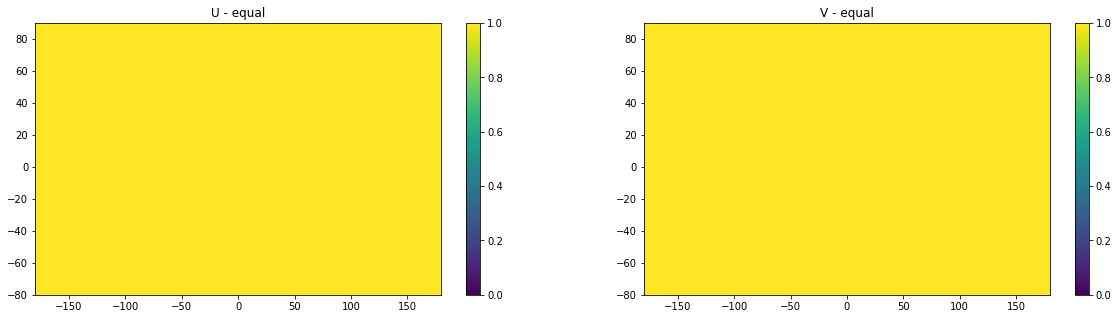

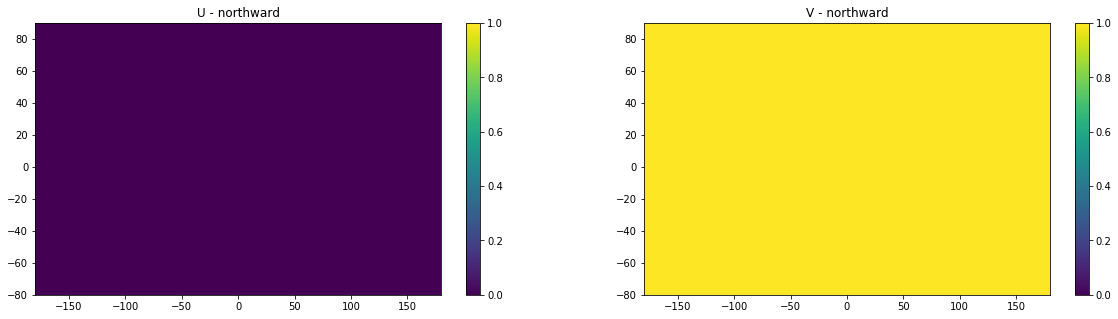

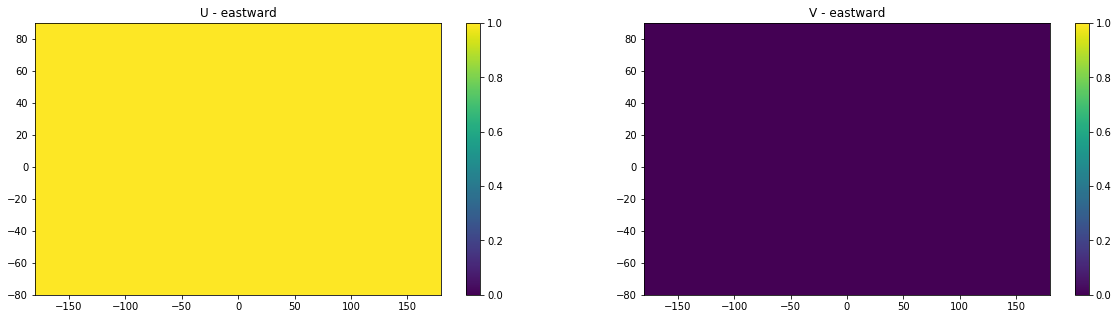

In [4]:
for test in tests:
    fig,axs=plt.subplots(1,2,figsize=(20,5))
    ax=axs[0]
    lon,lat,U,V = data[test]['lon'],data[test]['lat'],data[test]['U'],data[test]['V'] 
    mesh=ax.pcolormesh(lon, lat, U,vmin=0,vmax=1)
    plt.colorbar(mesh,ax=ax)
    ax.set_title('U - {}'.format(test))
    ax=axs[1]
    mesh=ax.pcolormesh(lon, lat, V,vmin=0,vmax=1)
    ax.set_title('V - {}'.format(test))
    plt.colorbar(mesh,ax=ax)

In [5]:
def compare_methods_cyl(U,V,lons,lats,st=75,scale=25):
    fig,axs = plt.subplots(1,2,figsize=(20,10))
    lonmesh,latmesh = np.meshgrid(lons, lats)
    
    for ax, method in zip(axs, ['rotate', 'latlon']):
        bmap = Basemap(projection='robin',lat_0=0, lon_0=0,ax=ax)
        bmap.drawcoastlines()
        bmap.fillcontinents(color='coral',lake_color='aqua')
        bmap.drawparallels(np.arange(-90.,120.,30.))
        bmap.drawmeridians(np.arange(0.,360.,60.))
        if method == 'rotate':
            unew, vnew, x, y = bmap.rotate_vector(U, V, lonmesh, latmesh, returnxy=True)
            bmap.quiver(x[::st,::st],y[::st,::st],unew[::st,::st],vnew[::st,::st],
                        scale=scale,ax=ax)
            ax.set_title('Quiver plot with rotate vector')
        else:
            bmap.quiver(lonmesh[::st,::st],latmesh[::st,::st],U[::st,::st],V[::st,::st],
                        latlon=True,scale=scale,ax=ax)
            ax.set_title('Quiver plot with latlon=True')
        bmap.plot(x[::st,::st],y[::st,::st],'ko')
    return fig

equal
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/nsoontiens/anaconda3/lib/python3.6/site-pack

northward
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
eastward
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


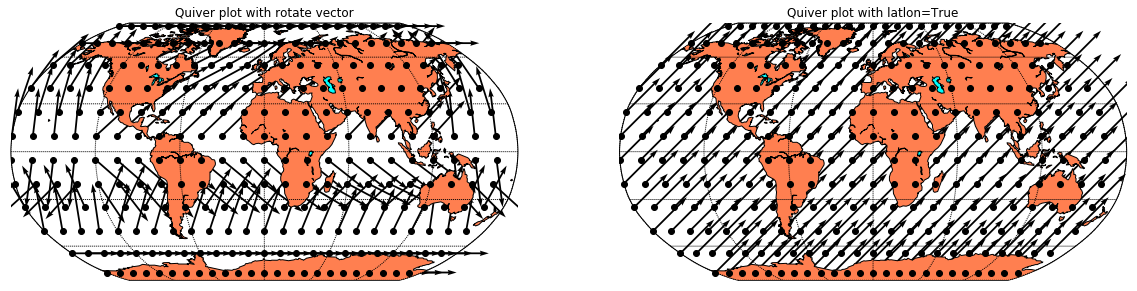

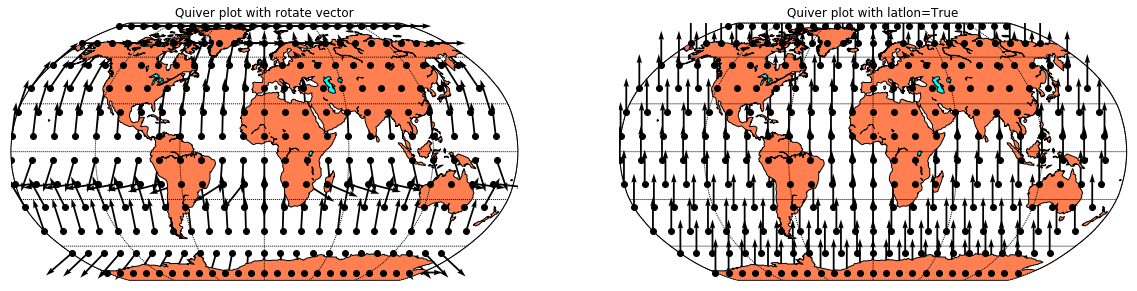

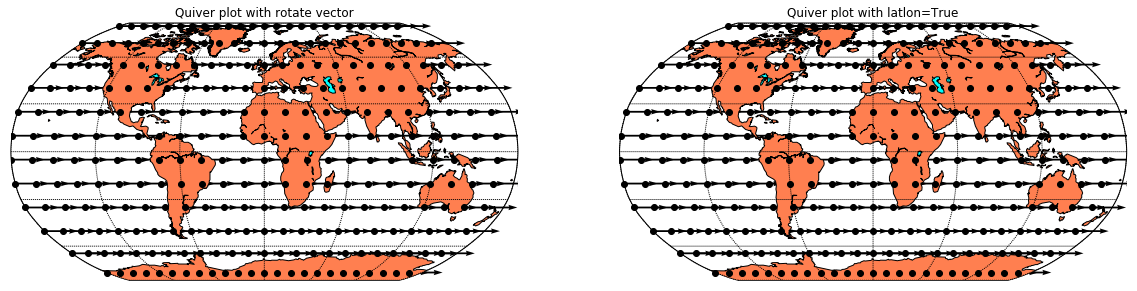

In [6]:
for test in tests:
    print(test)
    lon,lat,U,V = data[test]['lon'],data[test]['lat'],data[test]['U'],data[test]['V'] 
    print(U)
    fig = compare_methods_cyl(U,V,lon,lat,st=75,scale=15)

Neither are right!!

In [7]:
def compare_methods_polar(U,V,lons,lats,st=75,scale=25):
    fig,axs = plt.subplots(1,2,figsize=(20,10))
    lonmesh,latmesh = np.meshgrid(lons, lats)
    
    for ax, method in zip(axs, ['rotate', 'latlon']):
        bmap = Basemap(projection='npstere',boundinglat=60,lon_0=0,ax=ax)
        bmap.drawcoastlines()
        bmap.fillcontinents(color='coral',lake_color='aqua')
        bmap.drawparallels(np.arange(-90.,120.,30.))
        bmap.drawmeridians(np.arange(-180.,180.,60.))
        if method == 'rotate':
            unew, vnew, x, y = bmap.rotate_vector(U,V, lonmesh, latmesh, returnxy=True)
            bmap.quiver(x[::st,::st],y[::st,::st],unew[::st,::st],vnew[::st,::st],
                        scale=scale,ax=ax)
            ax.set_title('Quiver plot with rotate vector')
        else:
            bmap.quiver(lonmesh[::st,::st],latmesh[::st,::st],U[::st,::st],V[::st,::st],
                        latlon=True,scale=scale,ax=ax)
            ax.set_title('Quiver plot with latlon=True')
        bmap.plot(x[::st,::st],y[::st,::st],'ko')
    return fig

equal


/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDe

northward
eastward


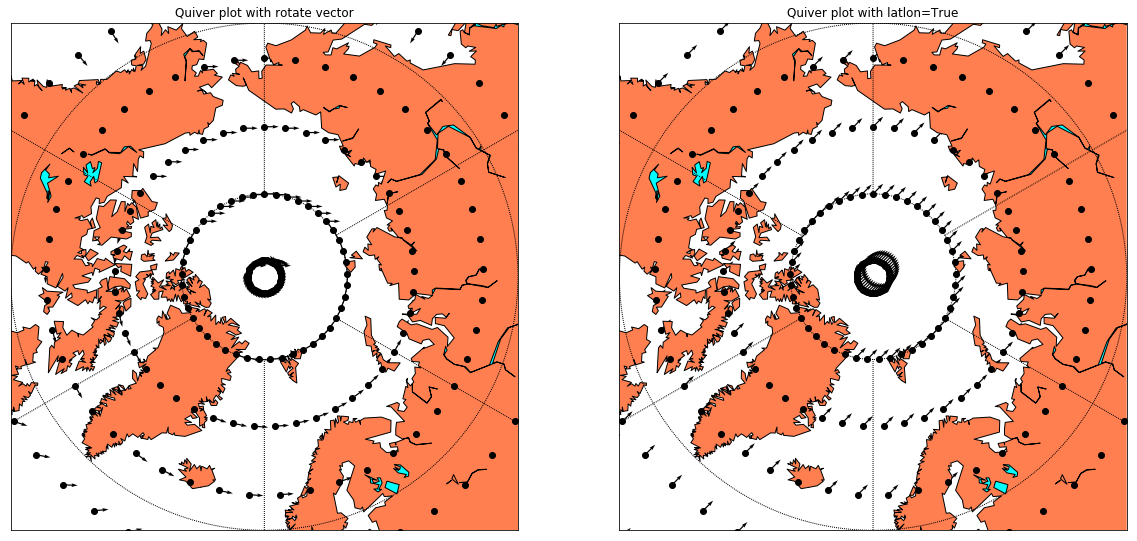

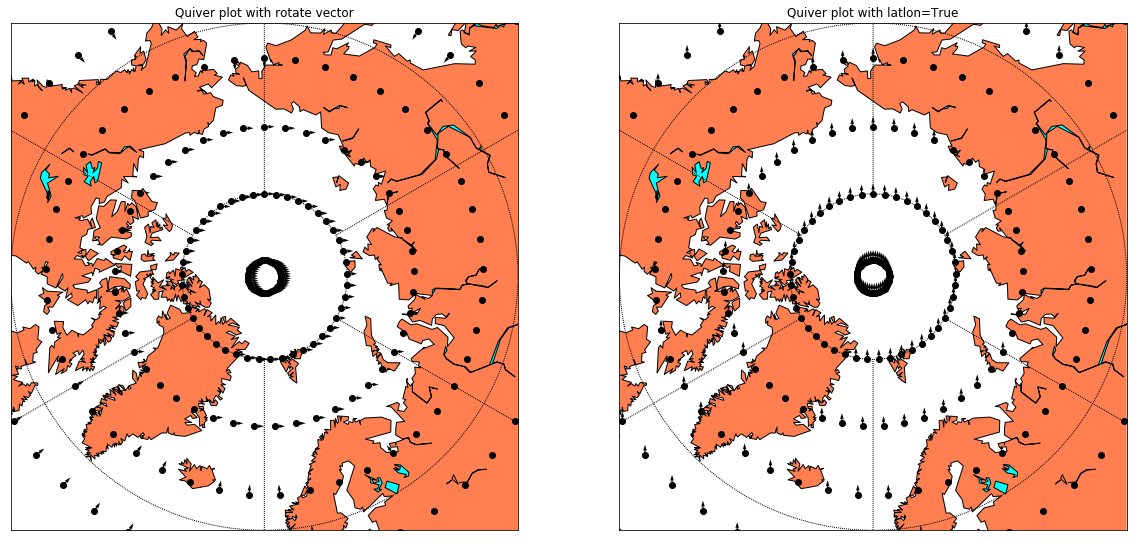

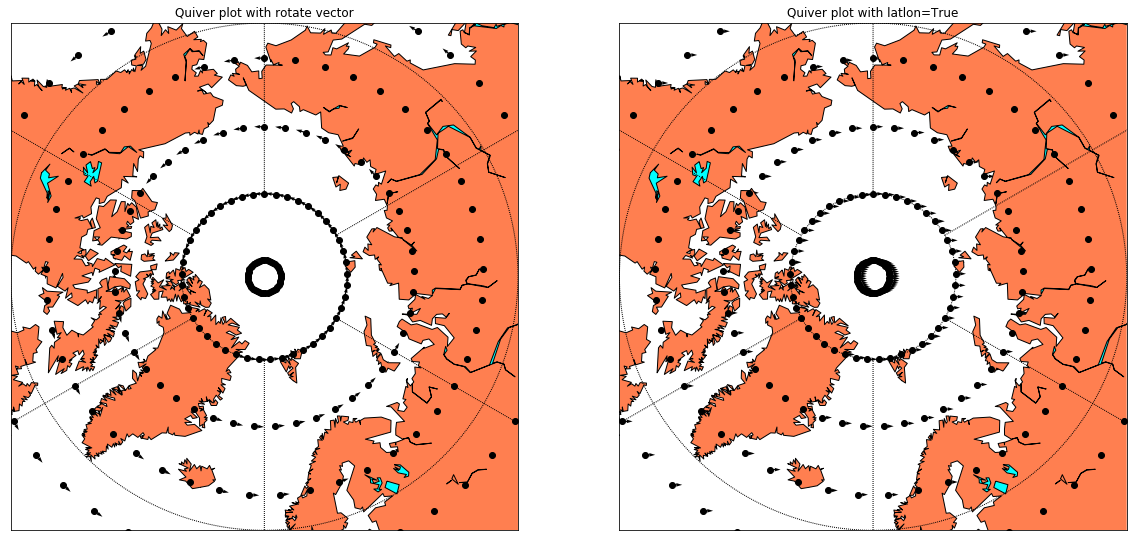

In [8]:
for test in tests:
    print(test)
    lon,lat,U,V = data[test]['lon'],data[test]['lat'],data[test]['U'],data[test]['V'] 
    fig = compare_methods_polar(U,V,lon,lat,st=40,scale=50)

# Construct my own datasets

/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/nsoontiens/anaconda3/lib/python3.6/site-pack

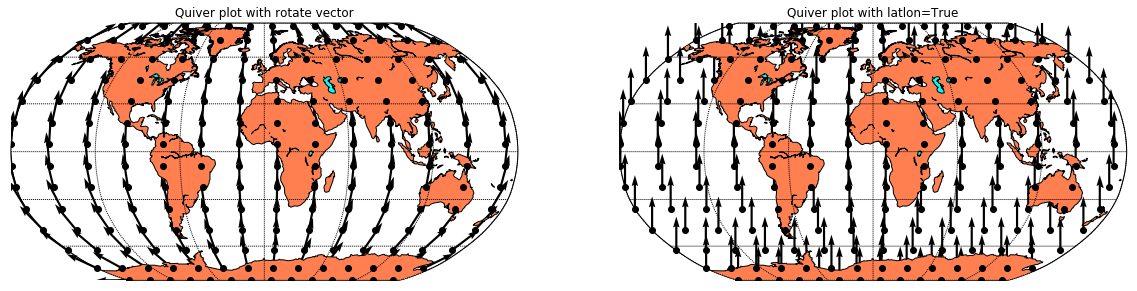

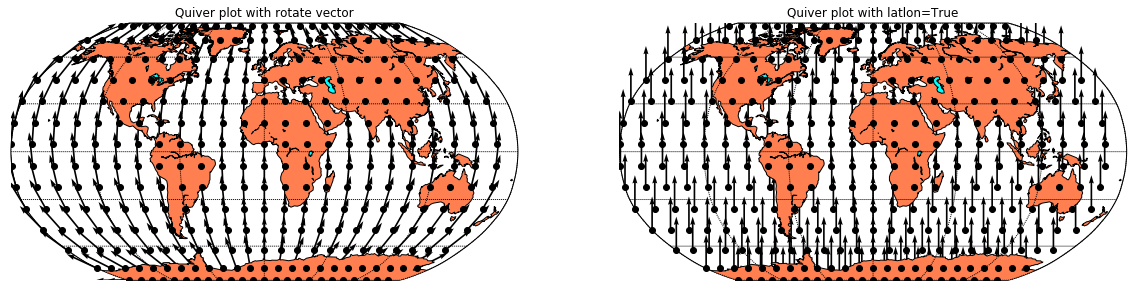

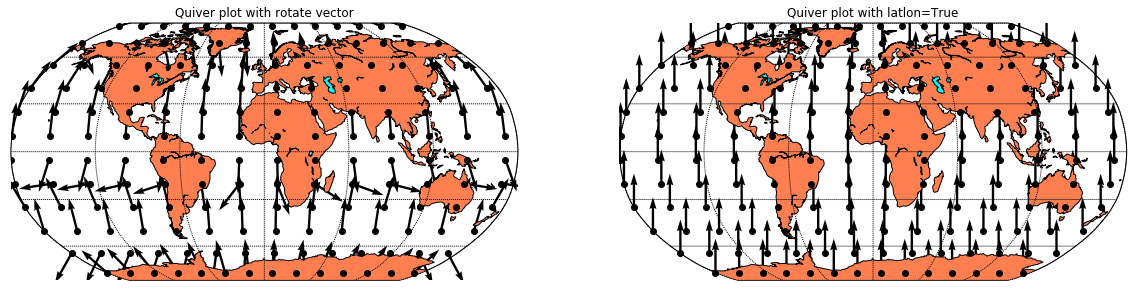

In [9]:
lons1 = np.linspace(-180,180,num=1000)
lats1 = np.linspace(-90,90,num=1000)

for lons, lats in zip([lons1, lon.copy(),lons1], [lats1, lats1, lat.copy()]):
    lonmesh, latmesh = np.meshgrid(lons,lats)
    Utest = np.zeros_like(lonmesh)
    Vtest = np.ones_like(lonmesh)
    fig = compare_methods_cyl(Utest,Vtest,lons,lats,st=75,scale=15)

/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDe

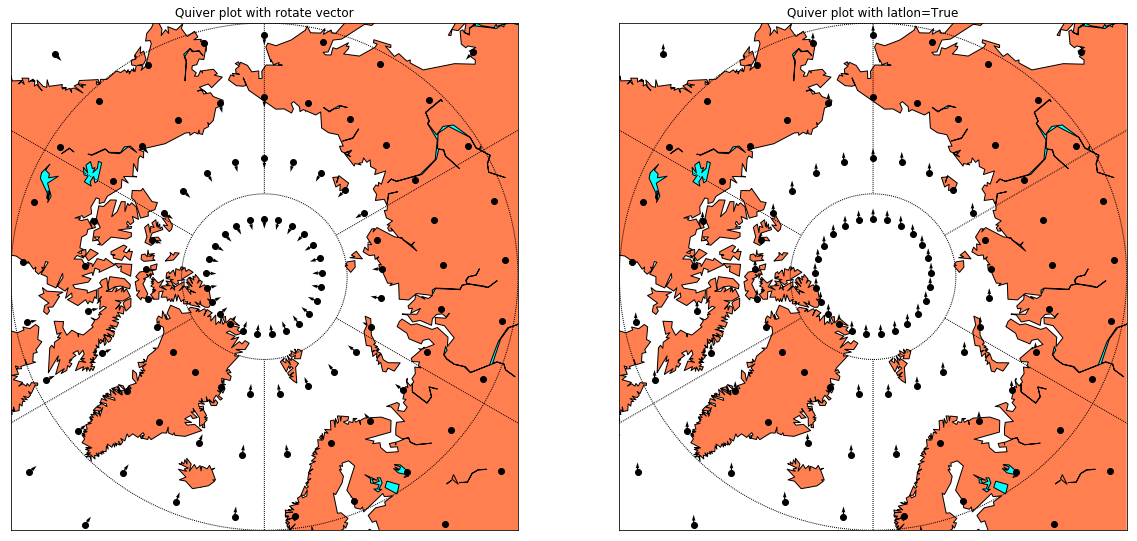

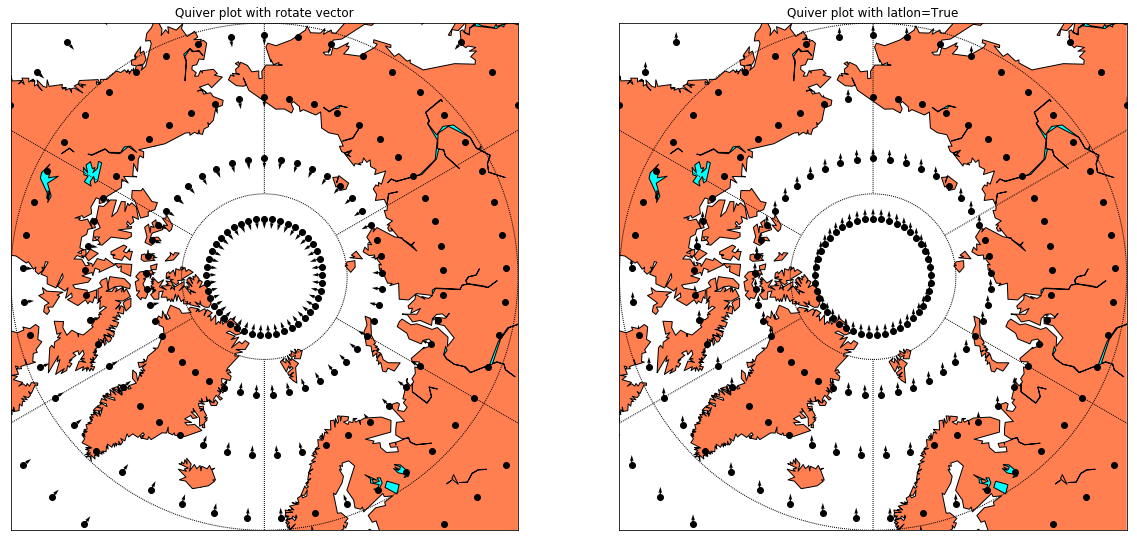

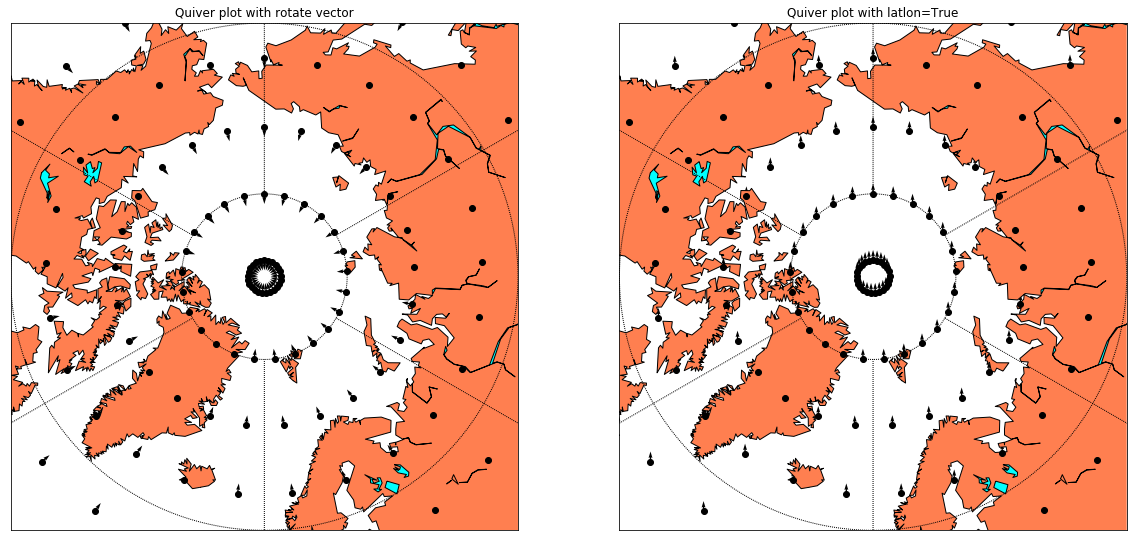

In [10]:
lons1 = np.linspace(-180,180,num=1000)
lats1 = np.linspace(-90,90,num=1000)

for lons, lats in zip([lons1, lon.copy(),lons1], [lats1, lats1, lat.copy()]):
    lonmesh, latmesh = np.meshgrid(lons,lats)
    Utest = np.zeros_like(lonmesh)
    Vtest = np.ones_like(lonmesh)
    fig = compare_methods_polar(Utest,Vtest,lons,lats,st=40,scale=50)

## Issues
* lats read in from GIOPS forecast file and a robin projection don't work. There may be isses on polar too but it is hard to tell.
* anything with latlon=True instead of rotate vector

### Why are GIOPS lats causing problems? 

In [11]:
(np.diff(lat)> 0).all()

True

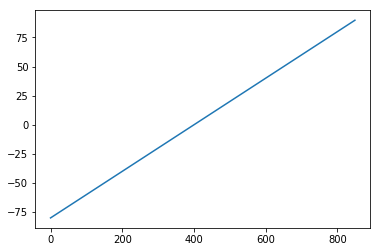

In [12]:
plt.plot(lat)

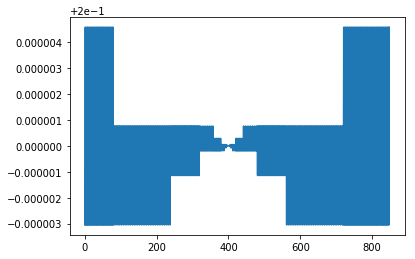

In [13]:
plt.plot(np.diff(lat))

* latitudes are increasing as expected.
* Maybe the irregular nature of the difference arrays is an issue?? Nothing in the documentaiton would indicate so.
* Maybe it is a non-issue because the navigator interpolates to a new grid anyways

## Recommendation
* STOP using latlon=True in any quiver plots.
* Use rotate_vector instead with the condition that lons are -180 to 180 and both lats and lons are increasing.